In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('cricket_data.csv')
# Load the dataset
df = pd.read_csv('cricket_data.csv')  
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Now print your dataframe
print(df)

# 1. Handle missing values
missing_values = df.isnull().sum()
df = df.fillna(0)  # or use df.dropna() to remove rows

# 2. Check for inconsistencies
inconsistencies = df.dtypes
summary_stats = df.describe()

# 3. Convert data types
numerical_cols = df.columns.drop(['Player_Name', 'Year'])
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# 4. Normalize numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 5. Handle duplicate records
df = df.drop_duplicates()


          Year              Player_Name Matches_Batted  Not_Outs Runs_Scored  \
0         2024          Ruturaj Gaikwad              2         0          61   
1         2023          Ruturaj Gaikwad             16         1         590   
2         2022          Ruturaj Gaikwad             14         0         368   
3         2021          Ruturaj Gaikwad             16         2         635   
4         2020          Ruturaj Gaikwad              6         2         204   
5         2023             Devon Conway             16         2         672   
6         2022             Devon Conway              7         1         252   
7         2024                 MS Dhoni              2         0           0   
8         2023                 MS Dhoni             16         8         104   
9         2022                 MS Dhoni             14         6         232   
10        2021                 MS Dhoni             16         4         114   
11        2020                 MS Dhoni 

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df = df.dropna()  

Missing values per column:
 Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64



Data types before conversion:
 Year                    object
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match     float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object

Descriptive statistics:
        Matches_Batted     Not_Outs  Runs_Scored  Highest_Score  \
count     1172.000000  1172.000000  1172.000000    1172.000000   
mean         8.693686

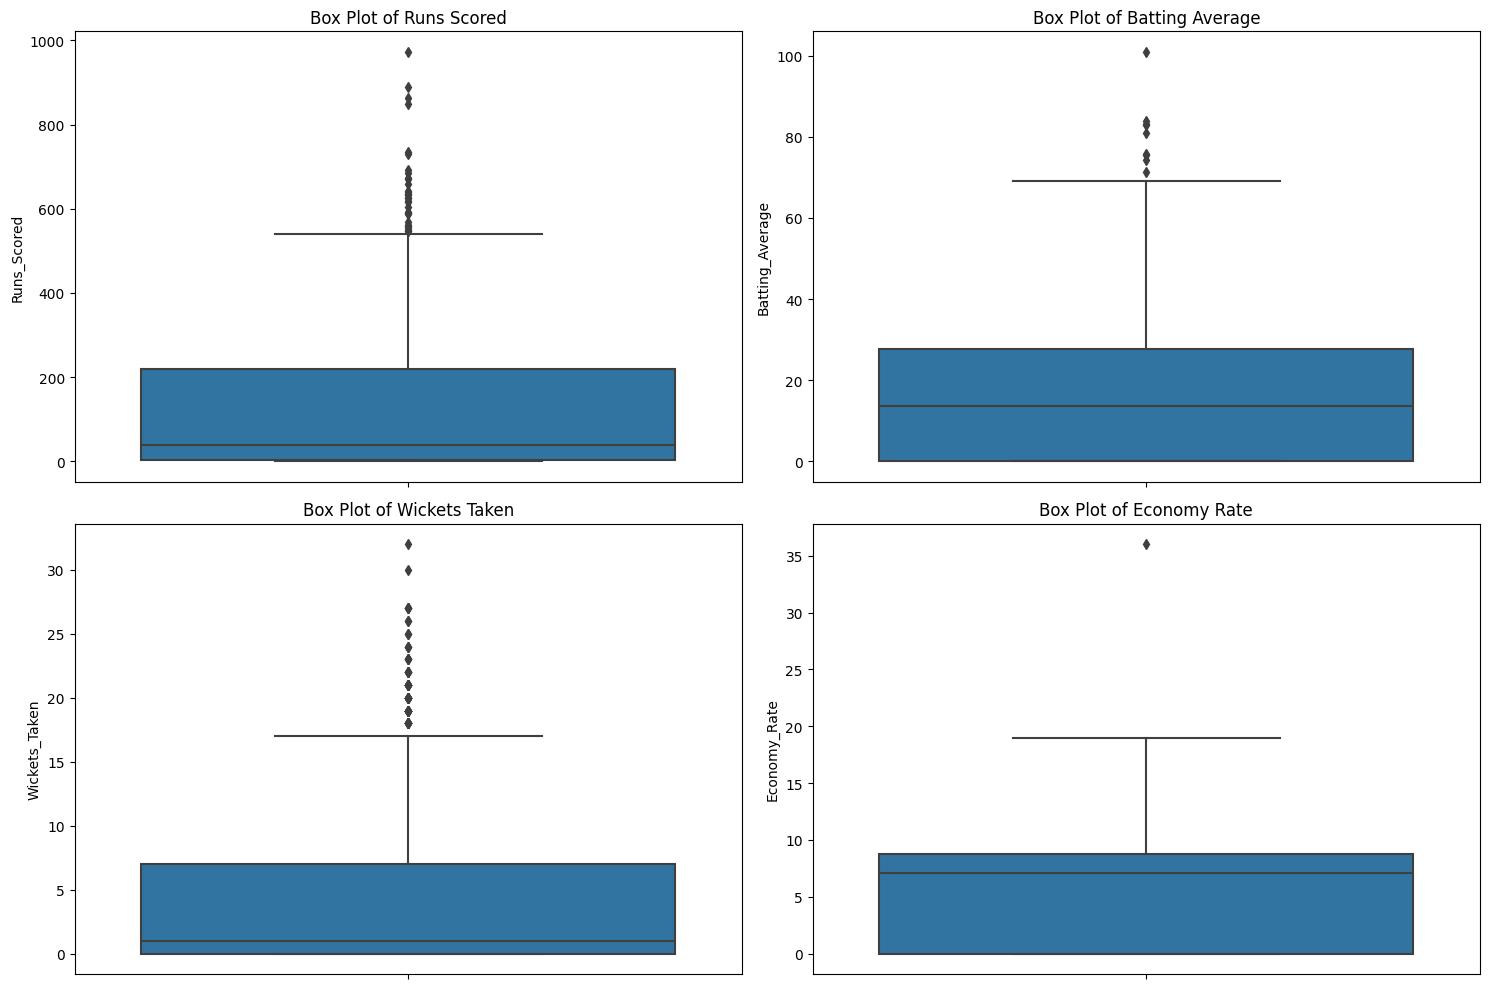


Consistency Check: Best_Bowling_Match format


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Check data types
print("\nData types before conversion:\n", df.dtypes)
print("\nDescriptive statistics:\n", df.describe())


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Runs_Scored'])
plt.title('Box Plot of Runs Scored')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Batting_Average'])
plt.title('Box Plot of Batting Average')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Wickets_Taken'])
plt.title('Box Plot of Wickets Taken')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Economy_Rate'])
plt.title('Box Plot of Economy Rate')
plt.tight_layout()
plt.show()

print("\nConsistency Check: Best_Bowling_Match format")


In [16]:
# Convert to numeric, coercing errors will turn invalid parsing into NaN, which we've handled previously.
numerical_cols_to_convert = ['Runs_Scored', 'Highest_Score', 'Batting_Average', 'Balls_Faced',
                             'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
                             'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
                             'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate',
                             'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']

for col in numerical_cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Re-check data types
print("\nData types after conversion:\n", df.dtypes)


Data types after conversion:
 Year                    object
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match     float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object


In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_to_normalize = ['Runs_Scored', 'Balls_Faced', 'Batting_Average', 'Batting_Strike_Rate',
                         'Wickets_Taken', 'Economy_Rate', 'Bowling_Average', 'Centuries', 'Half_Centuries']


df.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in features_to_normalize:
    if col in df.columns:
        df[col] = df[col].fillna(0)


min_max_scaler = MinMaxScaler()
df_normalized = df.copy() 
for col in features_to_normalize:
    if col in df_normalized.columns:
        df_normalized[col + '_Normalized'] = min_max_scaler.fit_transform(df_normalized[[col]])

print("\nDataFrame with Normalized features (first 5 rows):\n", df_normalized.head())




DataFrame with Normalized features (first 5 rows):
    Year      Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
0  2024  Ruturaj Gaikwad             2.0       0.0         61.0   
1  2023  Ruturaj Gaikwad            16.0       1.0        590.0   
2  2022  Ruturaj Gaikwad            14.0       0.0        368.0   
3  2021  Ruturaj Gaikwad            16.0       2.0        635.0   
4  2020  Ruturaj Gaikwad             6.0       2.0        204.0   

   Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0           46.0            30.50         51.0               119.61   
1           92.0            42.14        400.0               147.50   
2           99.0            26.29        291.0               126.46   
3            0.0            45.35        466.0               136.26   
4           72.0            51.00        169.0               120.71   

   Centuries  Half_Centuries  Fours  Sixes  Catches_Taken  Stumpings  \
0        0.0             0.0    8.0    1.0   

In [18]:
# Identify duplicate records
print("\nNumber of duplicate rows before handling:", df.duplicated().sum())


print("Number of duplicate (Player_Name, Year) combinations:", df.duplicated(subset=['Player_Name', 'Year']).sum())

df_no_duplicates = df.drop_duplicates()
print("Number of rows after dropping all duplicates:", len(df_no_duplicates))

df_unique_player_year = df.drop_duplicates(subset=['Player_Name', 'Year'], keep='first')
print("Number of rows after dropping duplicates based on Player_Name and Year:", len(df_unique_player_year))

df = df_unique_player_year.copy()


Number of duplicate rows before handling: 0
Number of duplicate (Player_Name, Year) combinations: 0
Number of rows after dropping all duplicates: 1172
Number of rows after dropping duplicates based on Player_Name and Year: 1172


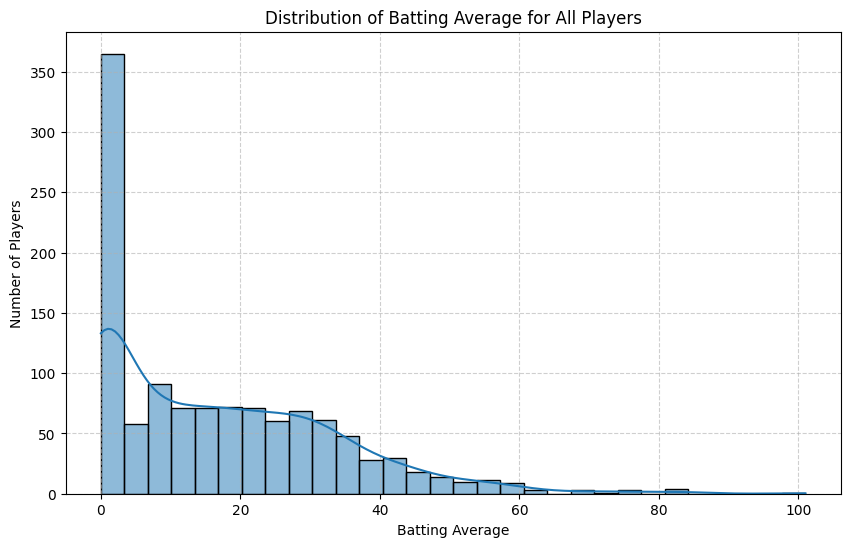


Descriptive statistics for Batting Average:
 count    1172.000000
mean       16.817679
std        16.552084
min         0.000000
25%         0.000000
50%        13.625000
75%        27.777500
max       101.000000
Name: Batting_Average, dtype: float64


In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Batting_Average'], bins=30, kde=True)
plt.title('Distribution of Batting Average for All Players')
plt.xlabel('Batting Average')
plt.ylabel('Number of Players')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nDescriptive statistics for Batting Average:\n", df['Batting_Average'].describe())

In [31]:
# Simply find the row with the highest Batting_Strike_Rate
max_sr_row = df.loc[df['Batting_Strike_Rate'].idxmax()]

print("Player with the highest Batting Strike Rate in a single IPL season:")
print(f"Player: {max_sr_row['Player_Name']}")
print(f"Batting Strike Rate: {max_sr_row['Batting_Strike_Rate']:.2f}")
print(f"Year: {max_sr_row['Year']}")


Player with the highest Batting Strike Rate in a single IPL season:
Player: Prerak Mankad
Batting Strike Rate: 400.00
Year: 2022


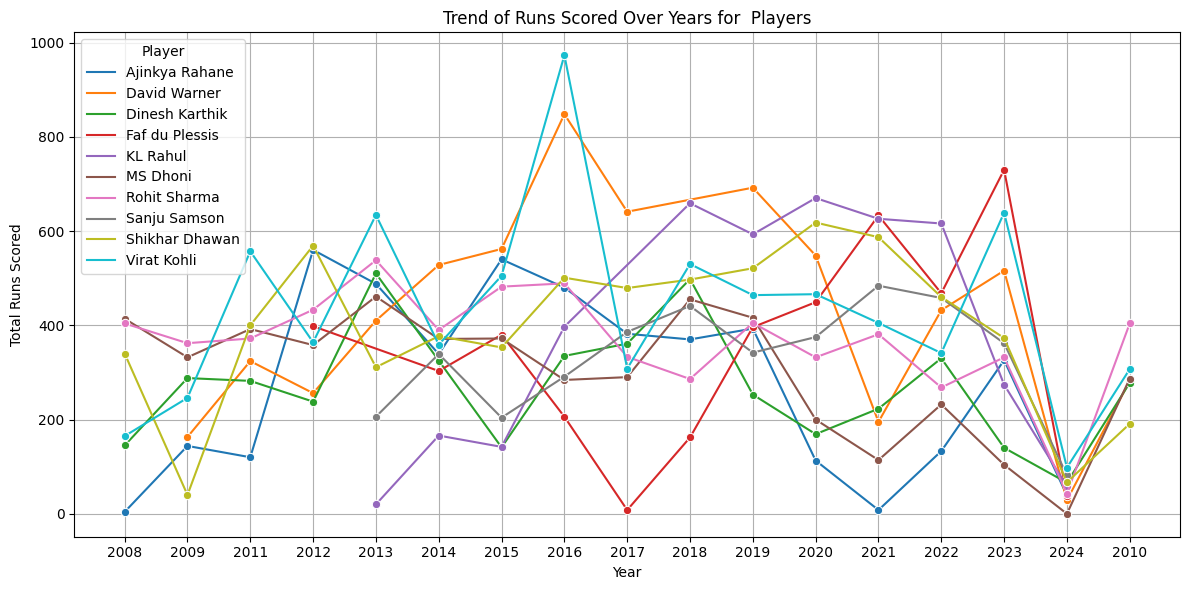

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Player and Year, sum up the Runs
runs_trend = df.groupby(['Player_Name', 'Year'])['Runs_Scored'].sum().reset_index()
# Top 5 players by total runs
top_players = df.groupby('Player_Name')['Runs_Scored'].sum().nlargest(10).index

# Filter runs_trend to include only top players
top_runs_trend = runs_trend[runs_trend['Player_Name'].isin(top_players)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_runs_trend, x='Year', y='Runs_Scored',hue='Player_Name', marker='o')

plt.title('Trend of Runs Scored Over Years for  Players')
plt.xlabel('Year')
plt.ylabel('Total Runs Scored')
plt.legend(title='Player')
plt.grid(True)
plt.tight_layout()
plt.show()

    





Top 3 Players with the Most Centuries:
Player_Name
Virat Kohli     7.0
Jos Buttler     5.0
David Warner    4.0
Name: Centuries, dtype: float64


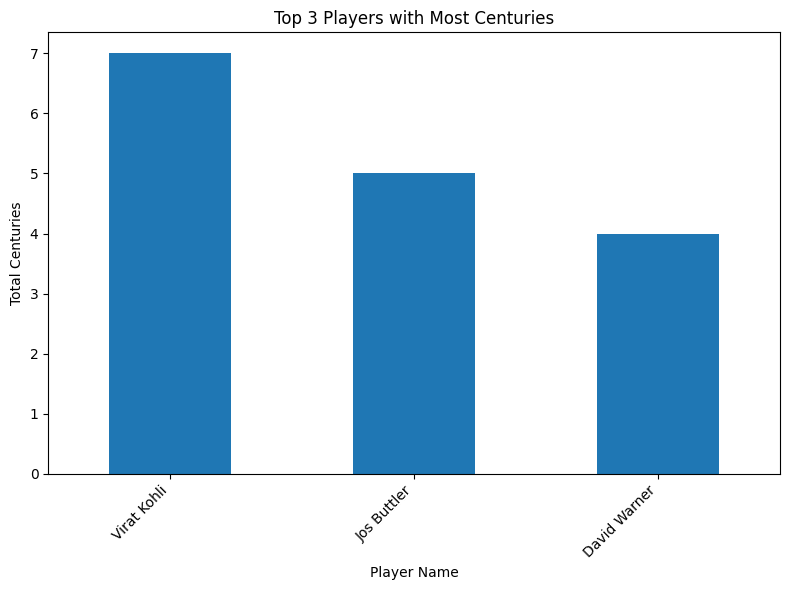

In [59]:
top_3_centuries = df.groupby('Player_Name')['Centuries'].sum().nlargest(3)

print("\nTop 3 Players with the Most Centuries:")
print(top_3_centuries)

plt.figure(figsize=(8, 6))
top_3_centuries.plot(kind='bar')
plt.title('Top 3 Players with Most Centuries')
plt.xlabel('Player Name')
plt.ylabel('Total Centuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
min_balls_bowled = 60 # Equivalant to 10 overs


valid_bowlers_df = df[(df['Balls_Bowled'] >= min_balls_bowled) & (df['Economy_Rate'] > 0)]

if not valid_bowlers_df.empty:
    highest_economy_player = valid_bowlers_df.loc[valid_bowlers_df['Economy_Rate'].idxmax()]

    print(f"\nPlayer with the highest Bowling Economy Rate (min {min_balls_bowled} balls bowled):")
    print(f"Player: {highest_economy_player['Player_Name']}")
    print(f"Economy Rate: {highest_economy_player['Economy_Rate']:.2f} (Year: {highest_economy_player['Year']})")
else:
    print(f"\nNo players found with at least {min_balls_bowled} balls bowled to determine highest Economy Rate.")

# To find the player with the highest overall average economy rate across all seasons they bowled:
if not valid_bowlers_df.empty:
    avg_economy_per_player = valid_bowlers_df.groupby('Player_Name')['Economy_Rate'].mean().idxmax()
    print(f"\nPlayer with the highest average Bowling Economy Rate across all seasons (min {min_balls_bowled} balls bowled per season): {avg_economy_per_player}")
    print(f"Average Economy Rate: {valid_bowlers_df[valid_bowlers_df['Player_Name'] == avg_economy_per_player]['Economy_Rate'].mean():.2f}")
else:
    print(f"\nNo players found with at least {min_balls_bowled} balls bowled to determine highest average Economy Rate.")


Player with the highest Bowling Economy Rate (min 60 balls bowled):
Player: Mohd. Arshad Khan
Economy Rate: 13.41 (Year: 2023)

Player with the highest average Bowling Economy Rate across all seasons (min 60 balls bowled per season): Mohd. Arshad Khan
Average Economy Rate: 13.41


In [64]:
# Handle potential division by zero if Runs_Scored is 0
df['Boundary_Runs'] = (df['Fours'] * 4) + (df['Sixes'] * 6)
df['Boundary_Percentage'] = df.apply(lambda row: (row['Boundary_Runs'] / row['Runs_Scored']) * 100 if row['Runs_Scored'] > 0 else 0, axis=1)

print("\nDataFrame with 'Boundary_Percentage' (first 5 rows):\n", df[['Player_Name', 'Year', 'Runs_Scored', 'Fours', 'Sixes', 'Boundary_Runs', 'Boundary_Percentage']].head())


DataFrame with 'Boundary_Percentage' (first 5 rows):
        Player_Name  Year  Runs_Scored  Fours  Sixes  Boundary_Runs  \
0  Ruturaj Gaikwad  2024         61.0    8.0    1.0           38.0   
1  Ruturaj Gaikwad  2023        590.0   46.0   30.0          364.0   
2  Ruturaj Gaikwad  2022        368.0   33.0   14.0          216.0   
3  Ruturaj Gaikwad  2021        635.0   64.0   23.0          394.0   
4  Ruturaj Gaikwad  2020        204.0   16.0    6.0          100.0   

   Boundary_Percentage  
0            62.295082  
1            61.694915  
2            58.695652  
3            62.047244  
4            49.019608  


In [65]:
df['Batting_Average'] = df['Batting_Average'].fillna(0)
df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].fillna(0)

# Normalize Runs_Scored, Batting_Strike_Rate, Batting_Average
scaler_impact = MinMaxScaler()
df['Runs_Scored_Normalized'] = scaler_impact.fit_transform(df[['Runs_Scored']])
df['Batting_Strike_Rate_Normalized'] = scaler_impact.fit_transform(df[['Batting_Strike_Rate']])
df['Batting_Average_Normalized'] = scaler_impact.fit_transform(df[['Batting_Average']])

# Example Impact Score formula (can be adjusted with different weights)
# Weights can be assigned based on importance: Runs (0.5), Strike Rate (0.3), Average (0.2)
df['Batting_Impact_Score'] = (df['Runs_Scored_Normalized'] * 0.5) + \
                             (df['Batting_Strike_Rate_Normalized'] * 0.3) + \
                             (df['Batting_Average_Normalized'] * 0.2)

print("\nDataFrame with 'Batting_Impact_Score' (first 5 rows):\n", df[['Player_Name', 'Year', 'Runs_Scored', 'Batting_Strike_Rate', 'Batting_Average', 'Batting_Impact_Score']].head())


DataFrame with 'Batting_Impact_Score' (first 5 rows):
        Player_Name  Year  Runs_Scored  Batting_Strike_Rate  Batting_Average  \
0  Ruturaj Gaikwad  2024         61.0               119.61            30.50   
1  Ruturaj Gaikwad  2023        590.0               147.50            42.14   
2  Ruturaj Gaikwad  2022        368.0               126.46            26.29   
3  Ruturaj Gaikwad  2021        635.0               136.26            45.35   
4  Ruturaj Gaikwad  2020        204.0               120.71            51.00   

   Batting_Impact_Score  
0              0.181450  
1              0.497257  
2              0.336010  
3              0.518307  
4              0.296353  


In [66]:

df['Wickets_Taken'] = df['Wickets_Taken'].fillna(0)
df['Economy_Rate'] = df['Economy_Rate'].fillna(0)
df['Bowling_Average'] = df['Bowling_Average'].fillna(0)

# Normalize key batting and bowling stats
scaler_allround = MinMaxScaler()

df['Runs_Scored_Norm'] = scaler_allround.fit_transform(df[['Runs_Scored']])
df['Batting_Strike_Rate_Norm'] = scaler_allround.fit_transform(df[['Batting_Strike_Rate']])
df['Wickets_Taken_Norm'] = scaler_allround.fit_transform(df[['Wickets_Taken']])

df['Economy_Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Bowling_Average'].replace([np.inf, -np.inf], np.nan, inplace=True)


temp_economy = df['Economy_Rate'].replace(0, np.nan)
temp_bowling_avg = df['Bowling_Average'].replace(0, np.nan)

# Normalize and then invert
df['Economy_Rate_Norm_Inv'] = scaler_allround.fit_transform(temp_economy.values.reshape(-1, 1))
df['Economy_Rate_Norm_Inv'] = 1 - df['Economy_Rate_Norm_Inv'] # Invert: higher is better
df['Economy_Rate_Norm_Inv'] = df['Economy_Rate_Norm_Inv'].fillna(0) # Fill NaNs (for non-bowlers) with 0

df['Bowling_Average_Norm_Inv'] = scaler_allround.fit_transform(temp_bowling_avg.values.reshape(-1, 1))
df['Bowling_Average_Norm_Inv'] = 1 - df['Bowling_Average_Norm_Inv'] # Invert: higher is better
df['Bowling_Average_Norm_Inv'] = df['Bowling_Average_Norm_Inv'].fillna(0) # Fill NaNs (for non-bowlers) with 0

df['All_Rounder_Score'] = (df['Runs_Scored_Norm'] * 0.3) + \
                          (df['Batting_Strike_Rate_Norm'] * 0.2) + \
                          (df['Wickets_Taken_Norm'] * 0.3) + \
                          (df['Economy_Rate_Norm_Inv'] * 0.1) + \
                          (df['Bowling_Average_Norm_Inv'] * 0.1)

print("\nDataFrame with 'All_Rounder_Score' (first 5 rows):\n", df[['Player_Name', 'Year', 'Runs_Scored', 'Wickets_Taken', 'All_Rounder_Score']].head())


DataFrame with 'All_Rounder_Score' (first 5 rows):
        Player_Name  Year  Runs_Scored  Wickets_Taken  All_Rounder_Score
0  Ruturaj Gaikwad  2024         61.0            0.0           0.078613
1  Ruturaj Gaikwad  2023        590.0            0.0           0.255662
2  Ruturaj Gaikwad  2022        368.0            0.0           0.176694
3  Ruturaj Gaikwad  2021        635.0            0.0           0.263916
4  Ruturaj Gaikwad  2020        204.0            0.0           0.123253



DataFrame with 'Batting_Style_Category' (first 5 rows):
        Player_Name  Year  Batting_Strike_Rate Batting_Style_Category
0  Ruturaj Gaikwad  2024               119.61              Defensive
1  Ruturaj Gaikwad  2023               147.50             Aggressive
2  Ruturaj Gaikwad  2022               126.46               Balanced
3  Ruturaj Gaikwad  2021               136.26               Balanced
4  Ruturaj Gaikwad  2020               120.71               Balanced

Distribution of Batting Style Categories:
 Batting_Style_Category
Defensive     617
Aggressive    278
Balanced      277
Name: count, dtype: int64


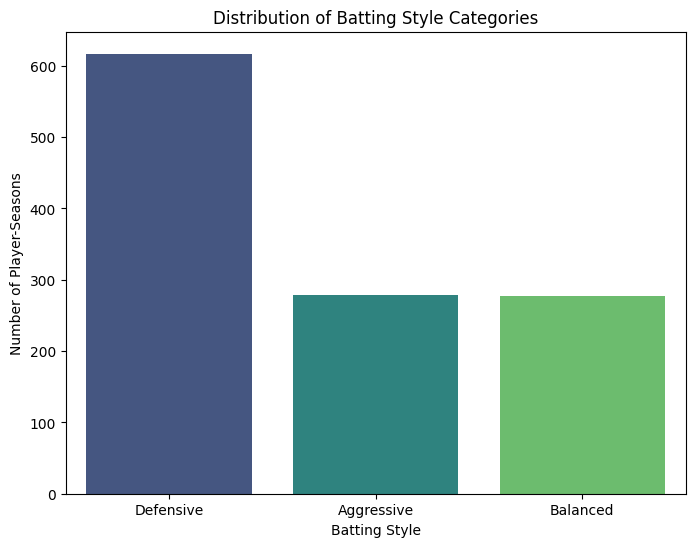

In [67]:


def categorize_strike_rate(strike_rate):
    if strike_rate > 140:
        return 'Aggressive'
    elif 120 <= strike_rate <= 140:
        return 'Balanced'
    else:
        return 'Defensive'

df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].fillna(0) 

df['Batting_Style_Category'] = df['Batting_Strike_Rate'].apply(categorize_strike_rate)

print("\nDataFrame with 'Batting_Style_Category' (first 5 rows):\n", df[['Player_Name', 'Year', 'Batting_Strike_Rate', 'Batting_Style_Category']].head())

print("\nDistribution of Batting Style Categories:\n", df['Batting_Style_Category'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='Batting_Style_Category', data=df, palette='viridis')
plt.title('Distribution of Batting Style Categories')
plt.xlabel('Batting Style')
plt.ylabel('Number of Player-Seasons')
plt.show()

In [68]:

metrics_for_yoy_growth = ['Runs_Scored', 'Wickets_Taken', 'Batting_Average', 'Economy_Rate']

# Sort data by player and year
df_sorted = df.sort_values(by=['Player_Name', 'Year'])

for metric in metrics_for_yoy_growth:
    # Calculate the percentage change year-over-year for each player
    # Group by Player_Name and then apply pct_change()
    df_sorted[f'{metric}_YOY_Growth'] = df_sorted.groupby('Player_Name')[metric].pct_change() * 100

print("\nDataFrame with Year-over-Year Growth for selected metrics (first 10 rows):\n", df_sorted[['Player_Name', 'Year'] + [f'{metric}_YOY_Growth' for metric in metrics_for_yoy_growth]].head(10))




DataFrame with Year-over-Year Growth for selected metrics (first 10 rows):
           Player_Name  Year  Runs_Scored_YOY_Growth  Wickets_Taken_YOY_Growth  \
1050      Abdul Samad  2020                     NaN                       NaN   
1049      Abdul Samad  2021                0.000000                       0.0   
1048      Abdul Samad  2022              -96.396396                    -100.0   
1047      Abdul Samad  2023             4125.000000                       NaN   
1046      Abdul Samad  2024              -91.124260                       NaN   
273   Abhinav Manohar  2022                     NaN                       NaN   
272   Abhinav Manohar  2023                5.555556                       NaN   
1096  Abhishek Sharma  2018                     NaN                       NaN   
1095  Abhishek Sharma  2019              -85.714286                       inf   
1094  Abhishek Sharma  2020              688.888889                     100.0   

      Batting_Average_YOY_Growt

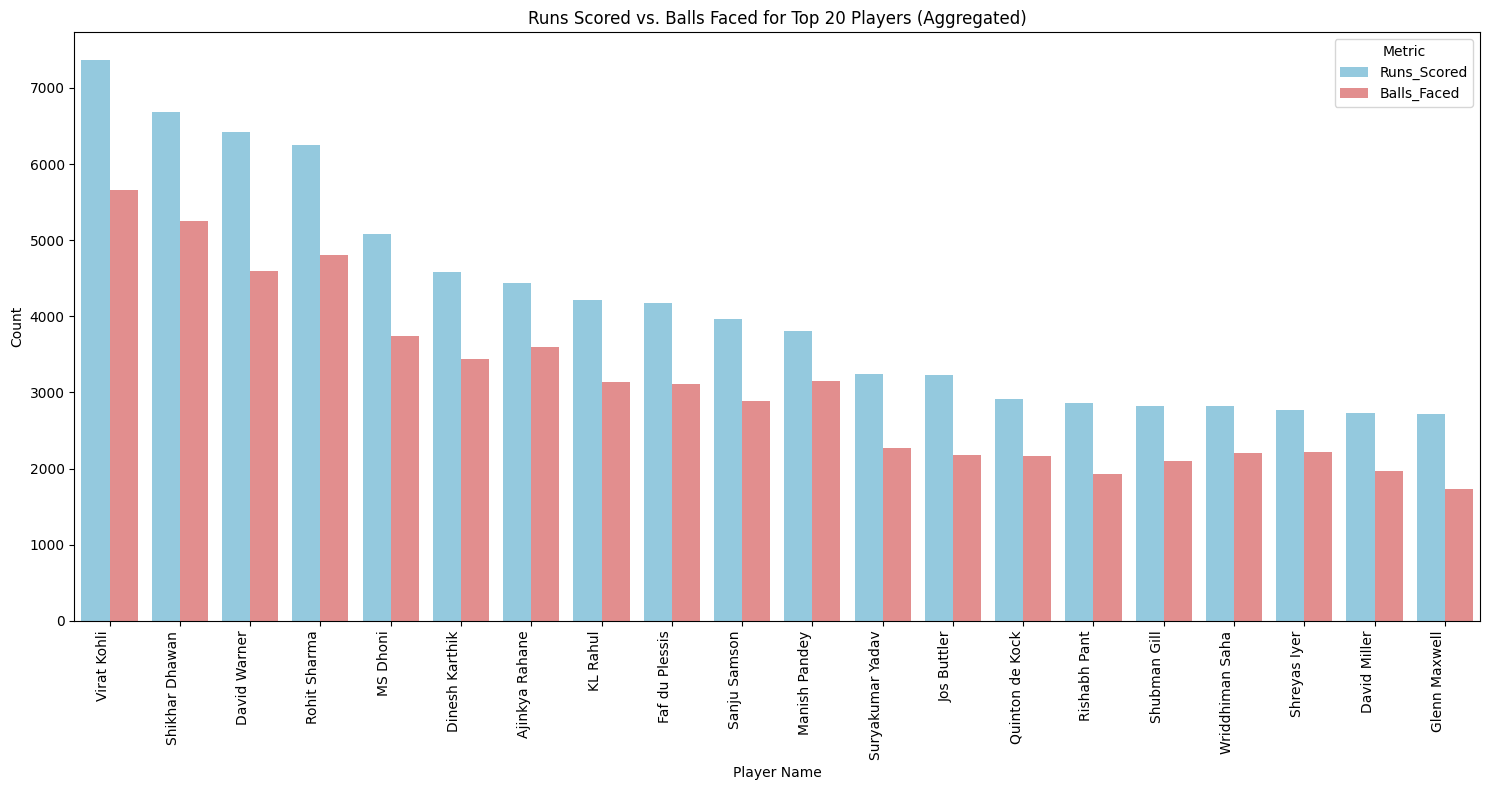

In [69]:
plt.figure(figsize=(15, 8))


top_players_for_plot = df.groupby('Player_Name')[['Runs_Scored', 'Balls_Faced']].sum().nlargest(20, 'Runs_Scored').reset_index()

# Melt the DataFrame for easier plotting with seaborn
df_melted = top_players_for_plot.melt(id_vars='Player_Name', value_vars=['Runs_Scored', 'Balls_Faced'], var_name='Metric', value_name='Value')

sns.barplot(x='Player_Name', y='Value', hue='Metric', data=df_melted, palette={'Runs_Scored': 'skyblue', 'Balls_Faced': 'lightcoral'})
plt.title('Runs Scored vs. Balls Faced for Top 20 Players (Aggregated)')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()



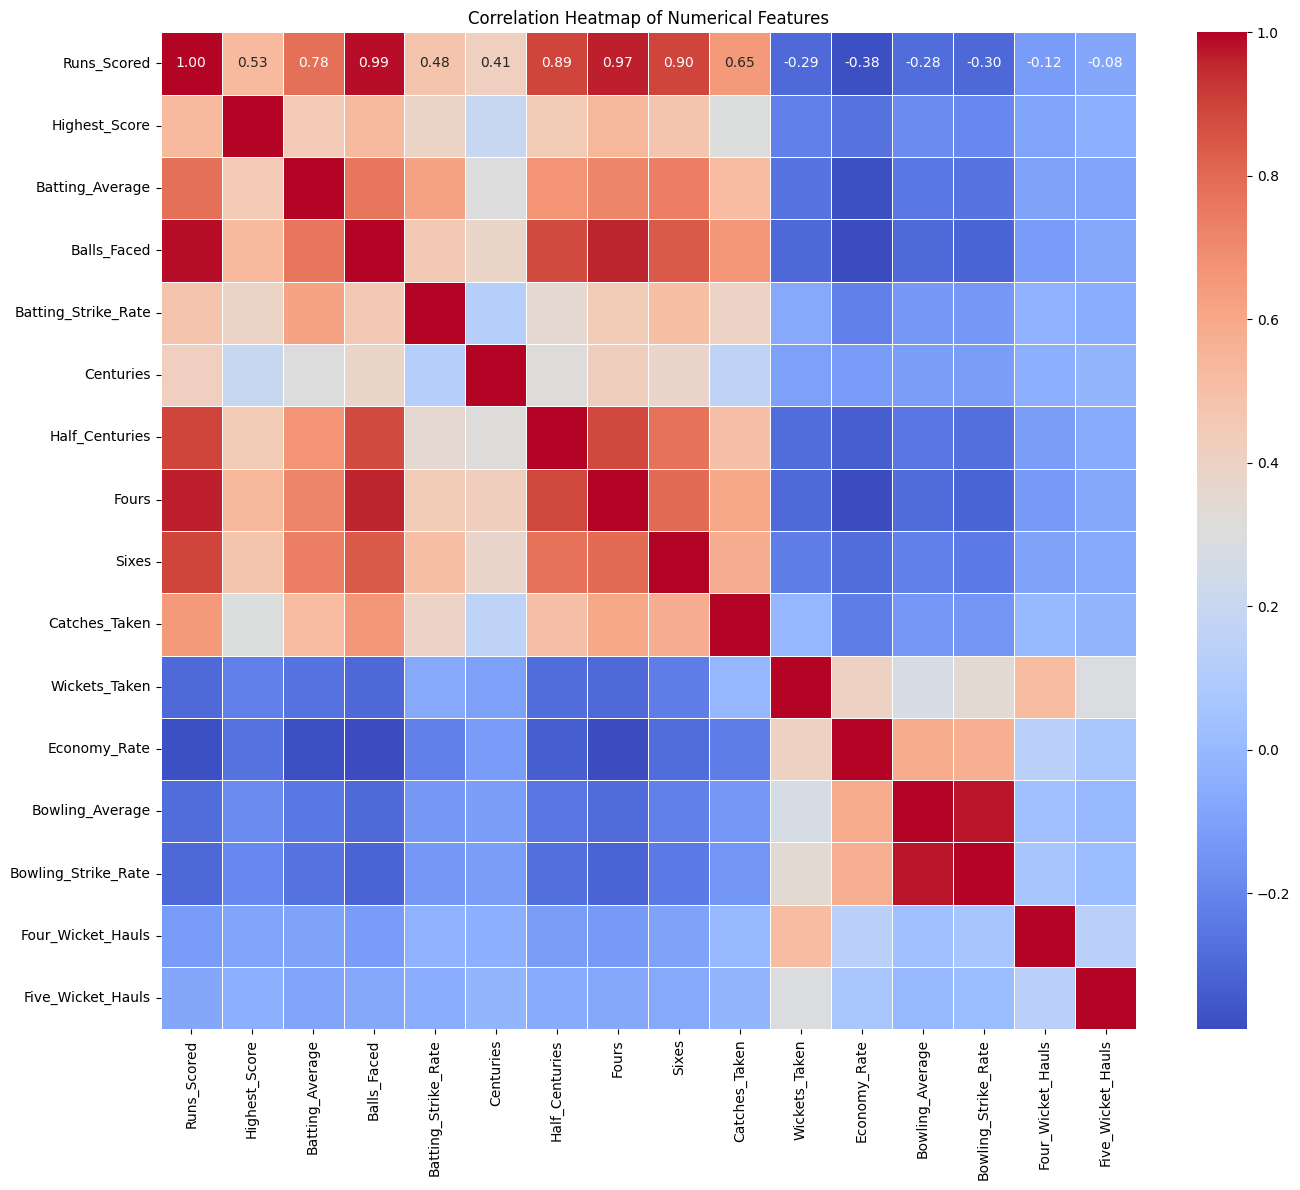

In [70]:

correlation_features = df[['Runs_Scored', 'Highest_Score', 'Batting_Average', 'Balls_Faced',
                           'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
                           'Catches_Taken', 'Wickets_Taken', 'Economy_Rate', 'Bowling_Average',
                           'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']]

# Calculate the correlation matrix
corr_matrix = correlation_features.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

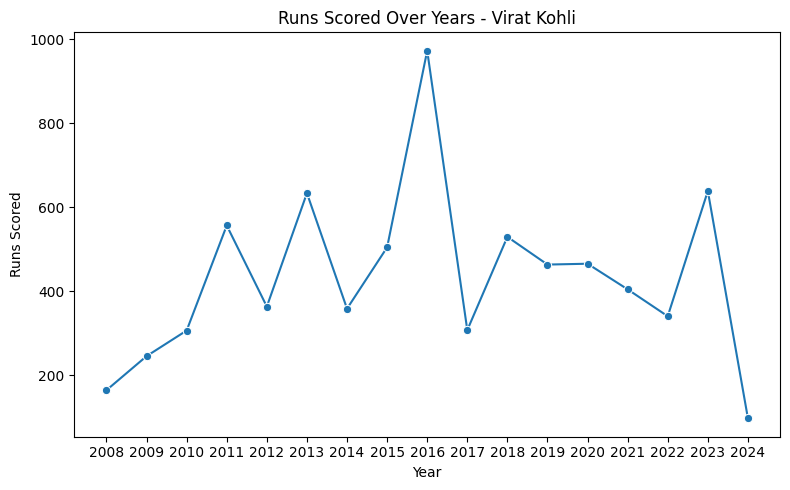

In [73]:
# Plot a trend line showing the performance of a single player over multiple years.
player_name = "Virat Kohli" 
player_data = df[df["Player_Name"] == player_name].sort_values("Year")

plt.figure(figsize=(8, 5))
sns.lineplot(data=player_data, x="Year", y="Runs_Scored", marker='o')
plt.title(f"Runs Scored Over Years - {player_name}")
plt.xlabel("Year")
plt.ylabel("Runs Scored")
plt.tight_layout()
plt.show()

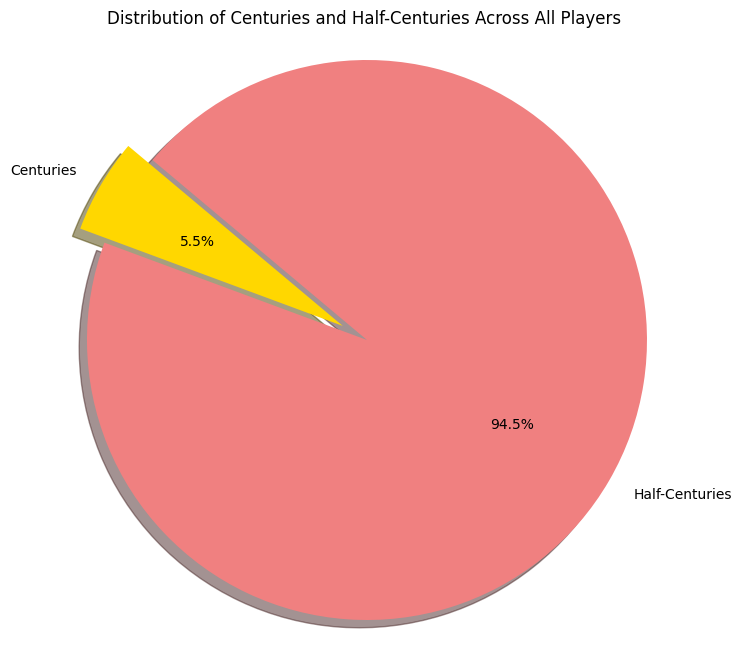

In [74]:
total_centuries = df['Centuries'].sum()
total_half_centuries = df['Half_Centuries'].sum()

labels = ['Centuries', 'Half-Centuries']
sizes = [total_centuries, total_half_centuries]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Centuries and Half-Centuries Across All Players')
plt.axis('equal') 
plt.show()

C:\Users\kulde\AppData\Local\Temp\ipykernel_8060\974060350.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


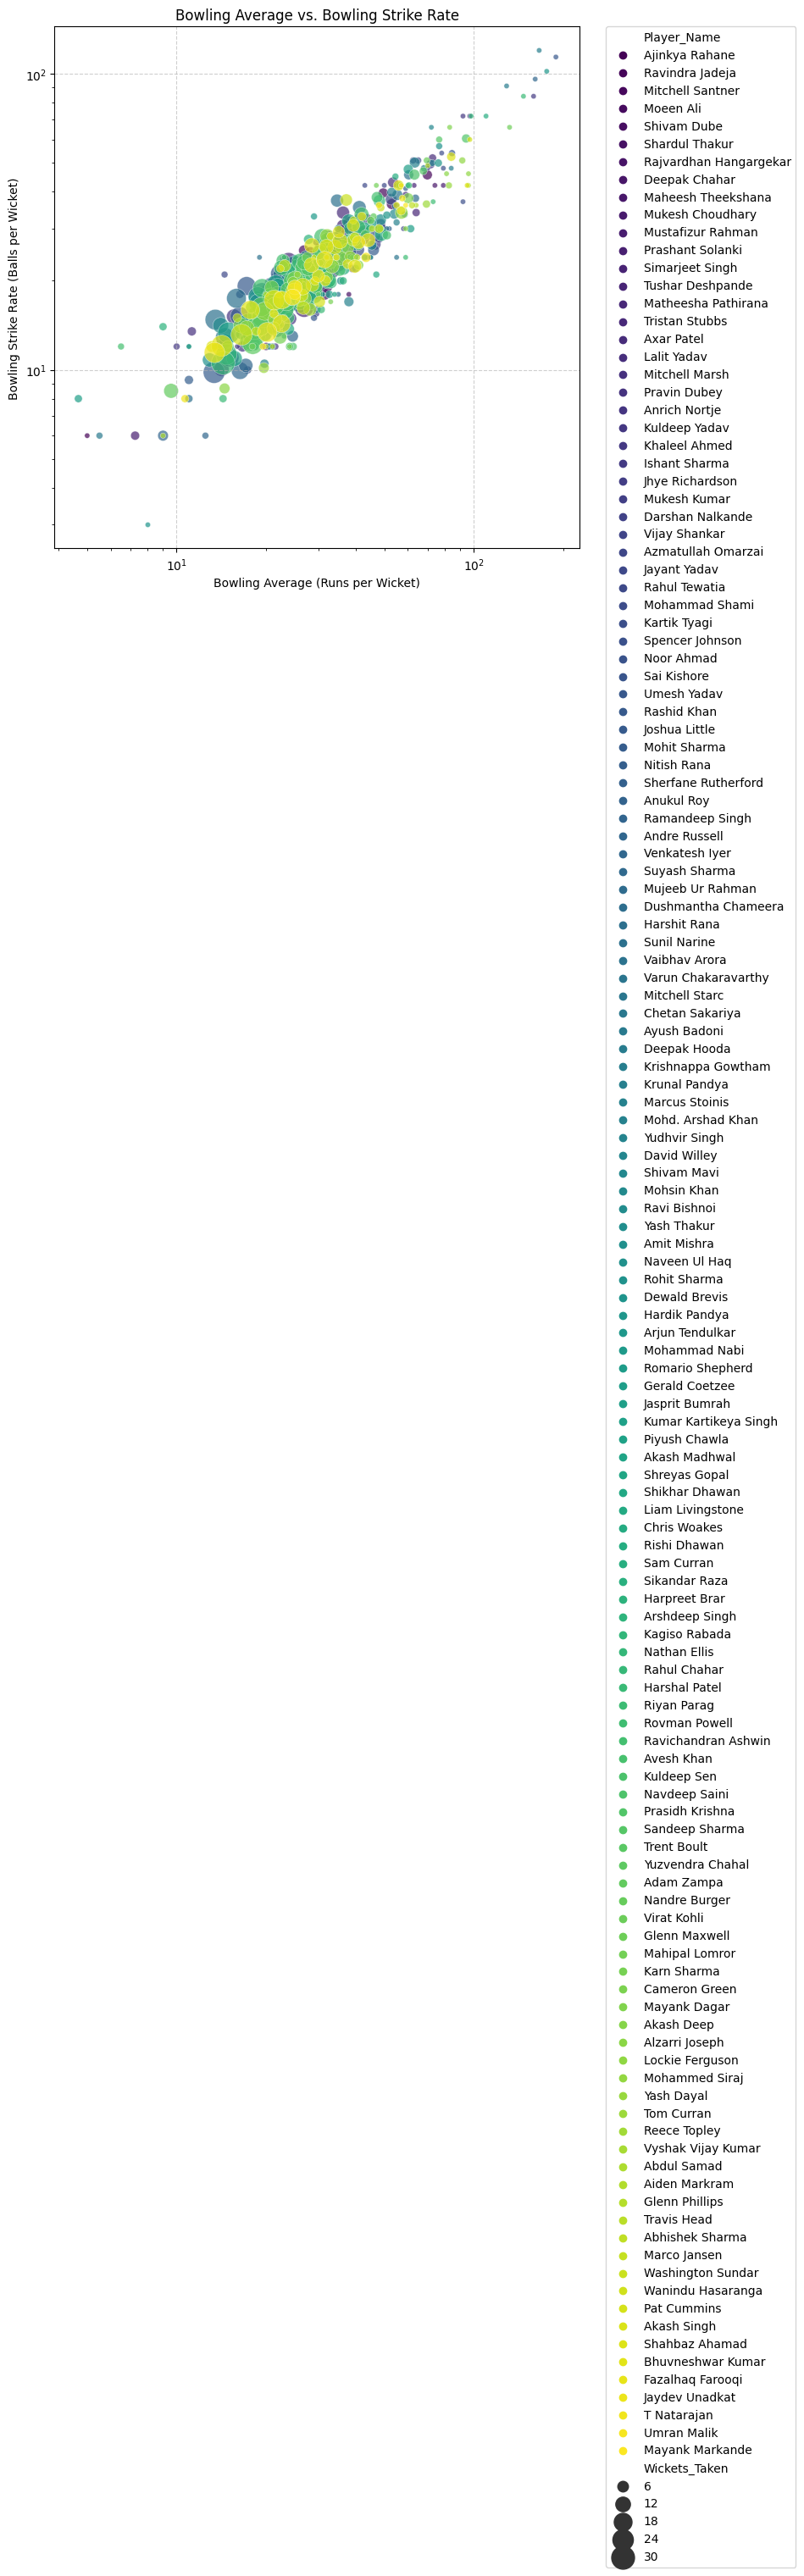

In [85]:

bowlers_df = df[(df['Wickets_Taken'] > 0) & (df['Balls_Bowled'] > 0)].copy()

if not bowlers_df.empty:
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x='Bowling_Average', y='Bowling_Strike_Rate', data=bowlers_df,
                    hue='Player_Name', size='Wickets_Taken', sizes=(20, 400),
                    alpha=0.7, palette='viridis')

    plt.title('Bowling Average vs. Bowling Strike Rate')
    plt.xlabel('Bowling Average (Runs per Wicket)')
    plt.ylabel('Bowling Strike Rate (Balls per Wicket)')
    plt.xscale('log') # Use log scale for average as it can have a wide range
    plt.yscale('log') # Use log scale for strike rate as it can have a wide range
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()
else:
    print("No sufficient bowling data to create 'Bowling Average vs. Bowling Strike Rate' plot.")

In [79]:

top_5_avg = df[df['Runs_Scored'] > 0].sort_values(by='Batting_Average', ascending=False).head(5)

print("\nTop 5 Players with the Highest Batting Average:")
print(top_5_avg[['Player_Name', 'Batting_Average', 'Runs_Scored', 'Matches_Batted', 'Not_Outs']])


Top 5 Players with the Highest Batting Average:
        Player_Name  Batting_Average  Runs_Scored  Matches_Batted  Not_Outs
509    Deepak Hooda           101.00        101.0             7.0       4.0
405   Manish Pandey            84.00        168.0             5.0       2.0
12         MS Dhoni            83.20        416.0            15.0       7.0
1040     Tom Curran            83.00         83.0             5.0       3.0
946     Virat Kohli            81.08        973.0            16.0       4.0


In [80]:
most_matches_batted = df.groupby('Player_Name')['Matches_Batted'].sum().nlargest(1)


most_matches_bowled = df.groupby('Player_Name')['Matches_Bowled'].sum().nlargest(1)

total_matches_played_per_player = df.groupby('Player_Name')['Matches_Batted'].sum() 
most_matches_player = total_matches_played_per_player.idxmax()
most_matches_count = total_matches_played_per_player.max()

print(f"\nPlayer who has played the most matches (based on Matches_Batted):")
print(f"Player: {most_matches_player}, Total Matches Batted: {most_matches_count}")


Player who has played the most matches (based on Matches_Batted):
Player: MS Dhoni, Total Matches Batted: 252.0


In [81]:
players_500_runs_in_season = df[df['Runs_Scored'] > 500][['Player_Name', 'Year', 'Runs_Scored']]

print("\nPlayers who have scored more than 500 runs in a season:")
print(players_500_runs_in_season)


Players who have scored more than 500 runs in a season:
          Player_Name  Year  Runs_Scored
1     Ruturaj Gaikwad  2023        590.0
3     Ruturaj Gaikwad  2021        635.0
5        Devon Conway  2023        672.0
33     Ajinkya Rahane  2015        540.0
36     Ajinkya Rahane  2012        560.0
121      Rishabh Pant  2018        684.0
125      David Warner  2023        516.0
128      David Warner  2020        548.0
129      David Warner  2019        692.0
130      David Warner  2017        641.0
131      David Warner  2016        848.0
132      David Warner  2015        562.0
133      David Warner  2014        528.0
223      Shubman Gill  2023        890.0
268   Kane Williamson  2018        735.0
363      Shreyas Iyer  2020        519.0
418     Andre Russell  2019        510.0
469          KL Rahul  2022        616.0
470          KL Rahul  2021        626.0
471          KL Rahul  2020        670.0
472          KL Rahul  2019        593.0
473          KL Rahul  2018        659.0


In [82]:
players_five_wicket_haul = df[df['Five_Wicket_Hauls'] >= 1][['Player_Name', 'Year', 'Five_Wicket_Hauls', 'Best_Bowling_Match']]

print("\nPlayers who have taken at least one five-wicket haul:")
print(players_five_wicket_haul)


Players who have taken at least one five-wicket haul:
              Player_Name  Year  Five_Wicket_Hauls  Best_Bowling_Match
55        Ravindra Jadeja  2012                1.0                 0.0
208         Ishant Sharma  2011                1.0                 0.0
350          Mohit Sharma  2023                1.0                 0.0
416         Andre Russell  2021                1.0                 0.0
452          Sunil Narine  2012                1.0                 0.0
459   Varun Chakaravarthy  2020                1.0                 0.0
575           Amit Mishra  2008                1.0                 0.0
654        Jasprit Bumrah  2022                1.0                 0.0
682         Akash Madhwal  2023                1.0                 0.0
769        Arshdeep Singh  2021                1.0                 0.0
793         Harshal Patel  2021                1.0                 0.0
909      Yuzvendra Chahal  2022                1.0                 0.0
920            Adam Za

In [83]:
total_boundaries_per_player = df.groupby('Player_Name').agg(
    Total_Fours=('Fours', 'sum'),
    Total_Sixes=('Sixes', 'sum')
).reset_index()

# Calculate total boundaries
total_boundaries_per_player['Total_Boundaries'] = total_boundaries_per_player['Total_Fours'] + total_boundaries_per_player['Total_Sixes']

print("\nTotal number of boundaries (Fours + Sixes) hit by each player:")
print(total_boundaries_per_player.sort_values(by='Total_Boundaries', ascending=False).head(10)) # Showing top 10


Total number of boundaries (Fours + Sixes) hit by each player:
        Player_Name  Total_Fours  Total_Sixes  Total_Boundaries
193  Shikhar Dhawan        759.0        149.0             908.0
233     Virat Kohli        654.0        237.0             891.0
41     David Warner        649.0        228.0             877.0
172    Rohit Sharma        561.0        258.0             819.0
50   Dinesh Karthik        445.0        143.0             588.0
98         MS Dhoni        349.0        239.0             588.0
8    Ajinkya Rahane        455.0         98.0             553.0
79         KL Rahul        359.0        170.0             529.0
53   Faf du Plessis        382.0        145.0             527.0
181    Sanju Samson        307.0        188.0             495.0
